# Week 2
## Learning Objectives
* Build a logistic regression model structured as a shallow neural network
* Build the general architecture of a learning algorithm, including parameter initialization, cost function and gradient calculation, and optimization implemetation (gradient descent)
* Implement computationally efficient and highly vectorized versions of models
* Compute derivatives for logistic regression, using a backpropagation mindset
* Use Numpy functions and Numpy matrix/vector operations
* Work with iPython Notebooks
* Implement vectorization across multiple training examples
* Explain the concept of broadcasting

## Binary Classification
We will learn key concepts of Deep Learning with the context of a lgoistic regression model.

Binary Classification: Assign a label of $1$ or $0$ to each object in the dataset.

One way to get a feature vector out of an image is "unrolling" it, i.e. just linearly iterating throug the entire tensor. For example if our image is $64 \times 64$ pixels with $3$ colors then this becomes a $64 \times 64 \times 3$ feature vector.

Notation $(x, y)$, $x \in \mathbb{R}^{n_x}, y \in \{0, 1\}$. If we have $m$ training examples then we write
$$
\left\{(\underline{x}^{(1)}, y^{(1)}), (\underline{x}^{(2)}, y^{(2)}), \dots, ((\underline{x}^{(m)}, y^{(m)})\right\}
$$
and we write them as a matrix $X \in \mathbb{R}^{n_x \times m}$, i.e. the $x^{(i)}$ make up the columns of the matrix. In the literature we sometimes see this matrix defined as the transpose of this, but our variant makes computational implementations easier.
We also write $Y = [y^{(1)}, y^{(2)}, \dots, y^{(m)}] \in \mathbb{R}^{1 \times m}$.

## Logistic Regression
Given $x$, want $\hat{y} = P(y = 1 | x)$ where $x \in \mathbb{R}^{n_x}$ and we have parameters $w \in \mathbb{R}^{n_x}, b \in \mathbb{R}$.

To make sure that our results are positive and at have a value of at most $1$ (i.e. they represent probabilities), then we apply the sigmoid to them:
$$
\hat{y} = \sigma(w^\top x + b).
$$

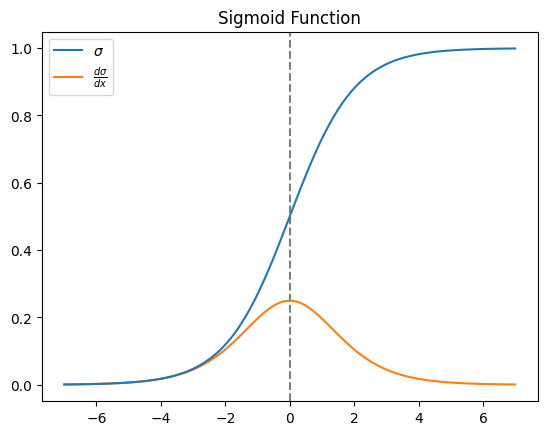

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-7, 7, 100)
y = 1 / (1 + np.exp(-x))
yp = np.exp(-x) / (1 + np.exp(-x))**2
plt.plot(x, y, label = "$\\sigma$", zorder = 3)
plt.plot(x, yp, label = "$\\frac{d\\sigma}{dx}$", zorder = 2)
plt.title("Sigmoid Function")
plt.axvline(0, color='black', zorder = 1, linestyle = '--', alpha = 0.5)
plt.legend()
plt.show()

## Logistic Regression Cost Function
Loss (error) function:
$$
\mathcal{L}(\hat{y}, y) = \frac{1}{2}(\hat{y} - y)^2.
$$
This has theoretical and practical problems as the logistic problem might cause the optimization problem to no longer be convex and then gradient descent could give us local minima, which is not what we want to happen.

Instead we use
$$
\mathcal{L}(\hat{y}, y) = -\left( y \log \hat{y} + (1 - y)\log(1 - \hat{y})\right)
$$
The motivation for this formulation is that if $y = 1$ then
$$
\mathcal{L}(\hat{y}, y) = \mathcal{L}(\hat{y}, 1) = -\log \hat{y}
$$
and to minimize this we want $\hat{y}$ to be as close to $1$ as possible. Similiarly if $y = 0$
$$
\mathcal{L}(\hat{y}, y) = \mathcal{L}(\hat{y}, 0) = -\log(1 - \hat{y})
$$
then we want $\hat{y}$ to be as small as possible (i.e. as close to $0$ as possible).

The Cost function is defined by
$$
\begin{aligned}
J(w, b) &= \frac{1}{m} \sum_{i = 1}^m \mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right) \\
&= - \frac{1}{m} \sum_{i = 1}^m \left( y \log \hat{y} + (1 - y)\log(1 - \hat{y})\right)
\end{aligned}
$$

The goal for our optimization problem is to make this cost function $J$ to be as small as possible.

## Gradient Descent
The key procedure of gradient descent is the update step
$$
\begin{aligned}
w &\leftarrow w - \alpha \frac{\partial J}{\partial w}(w, b) \\
b &\leftarrow b - \alpha \frac{\partial J}{\partial b}(w, b)
\end{aligned}
$$
where $\alpha > 0$ is called the learning rate.

In [35]:
a = np.array([[1, 1], [1, -1]])
b = np.array([[2], [3]])

In [36]:
a + b

array([[3, 3],
       [4, 2]])